In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", color_codes=True)

iris = pd.read_csv("../input/Iris.csv")

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
iris.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

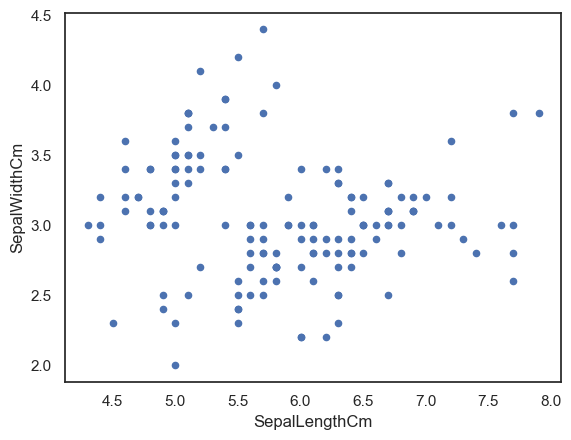

In [3]:
iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm')

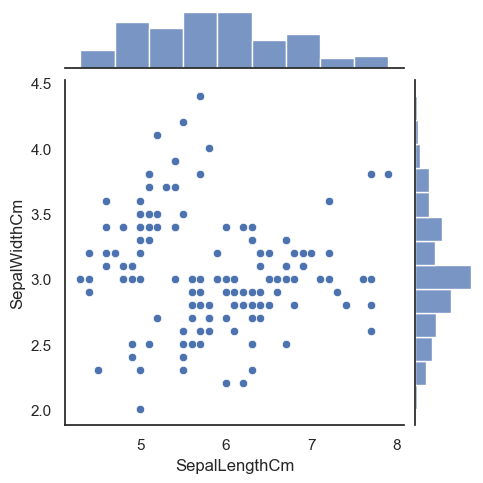

In [4]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, height=5, )

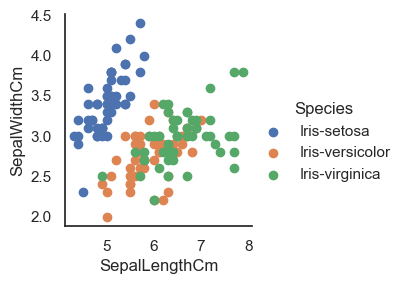

In [5]:
sns.FacetGrid(iris, hue="Species").map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

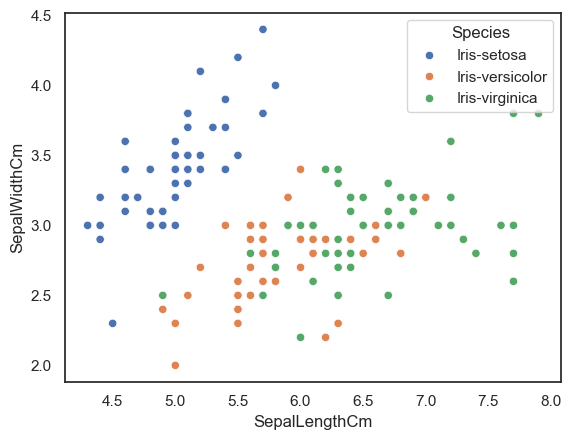

In [6]:
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=iris)

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

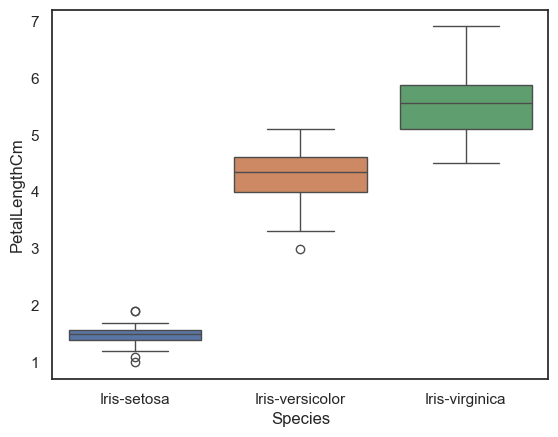

In [7]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris,hue="Species")

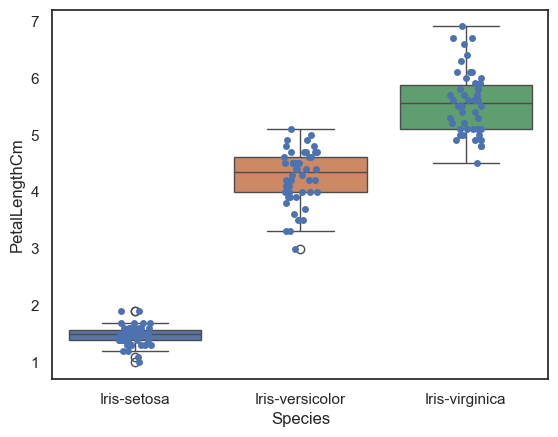

In [8]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris, hue='Species')
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="auto")

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

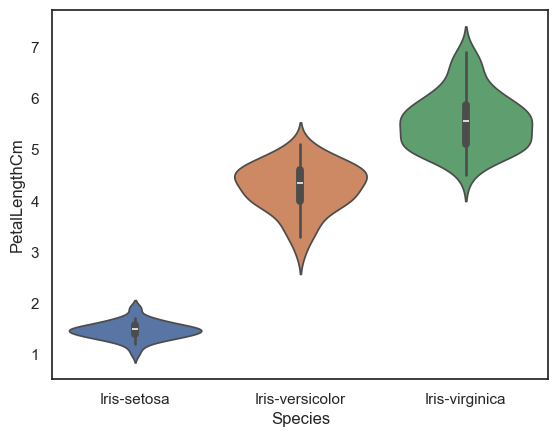

In [9]:
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, hue="Species")

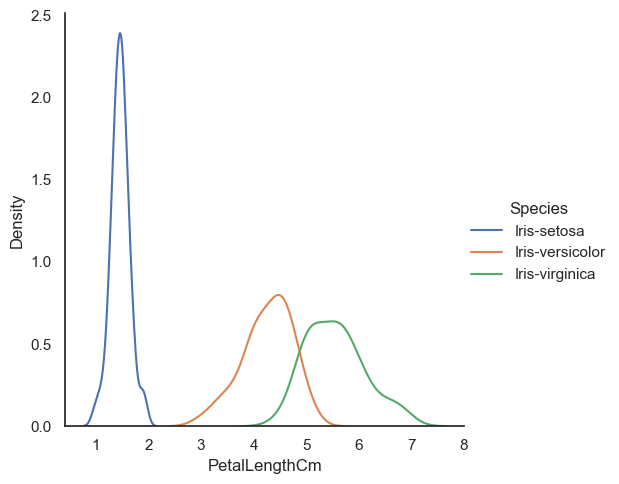

In [10]:
sns.FacetGrid(iris, hue="Species", height=5) \
    .map(sns.kdeplot,  "PetalLengthCm") \
    .add_legend()

In [11]:
iris.drop('Id', axis=1).head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


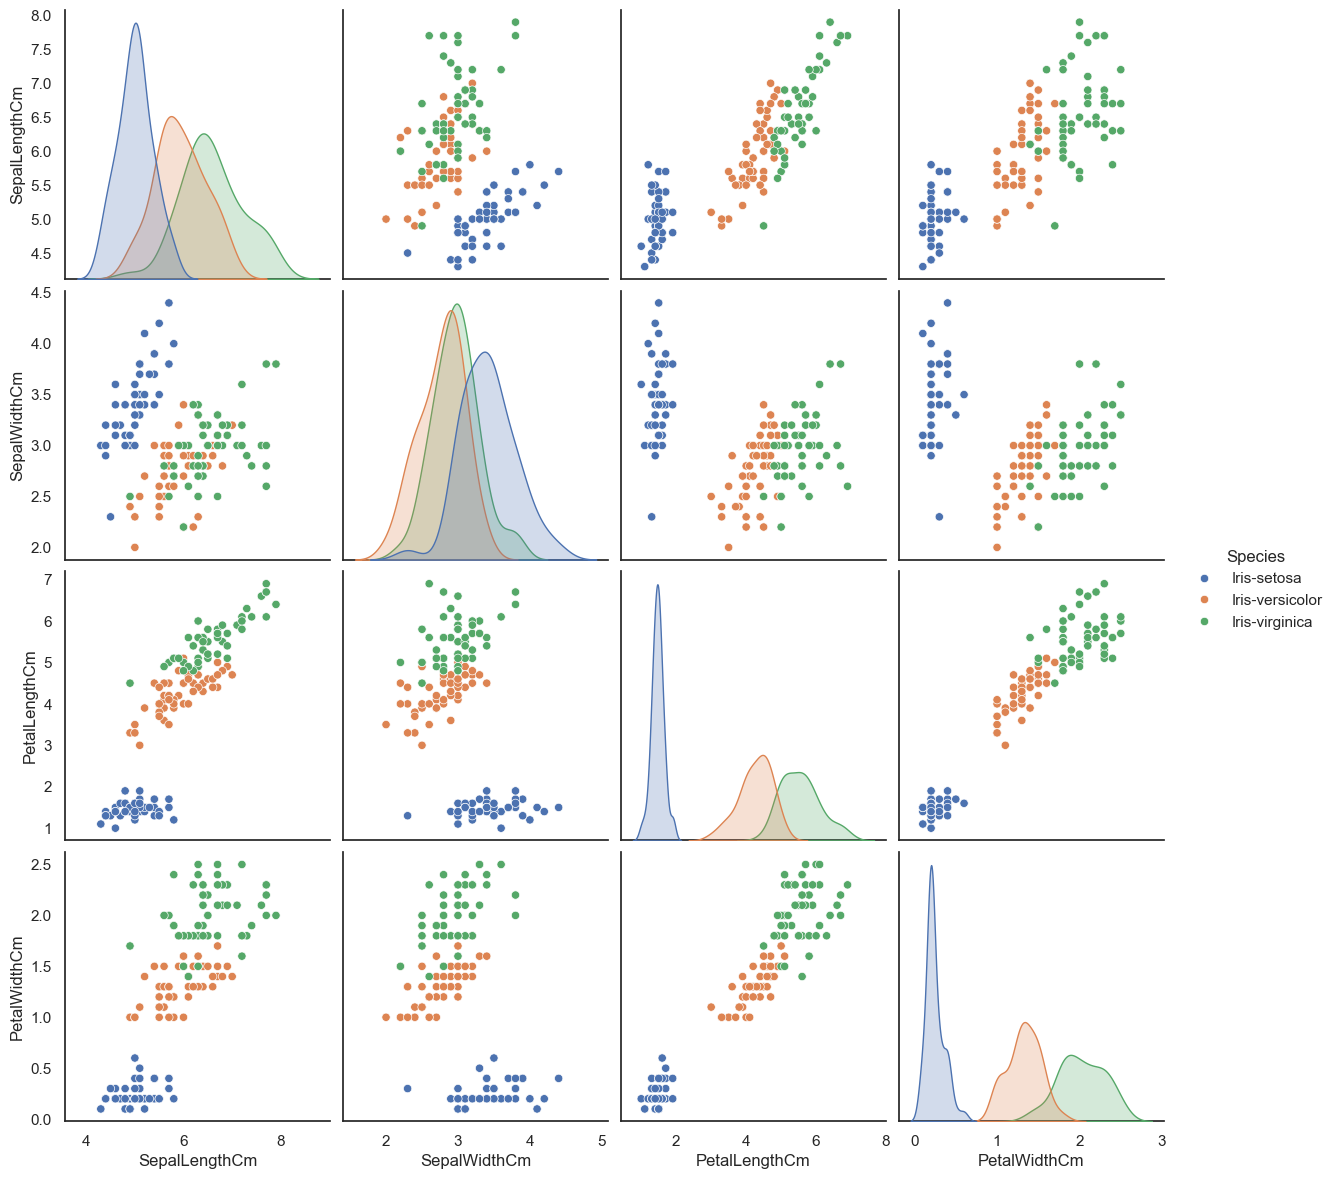

In [12]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", height=3)

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

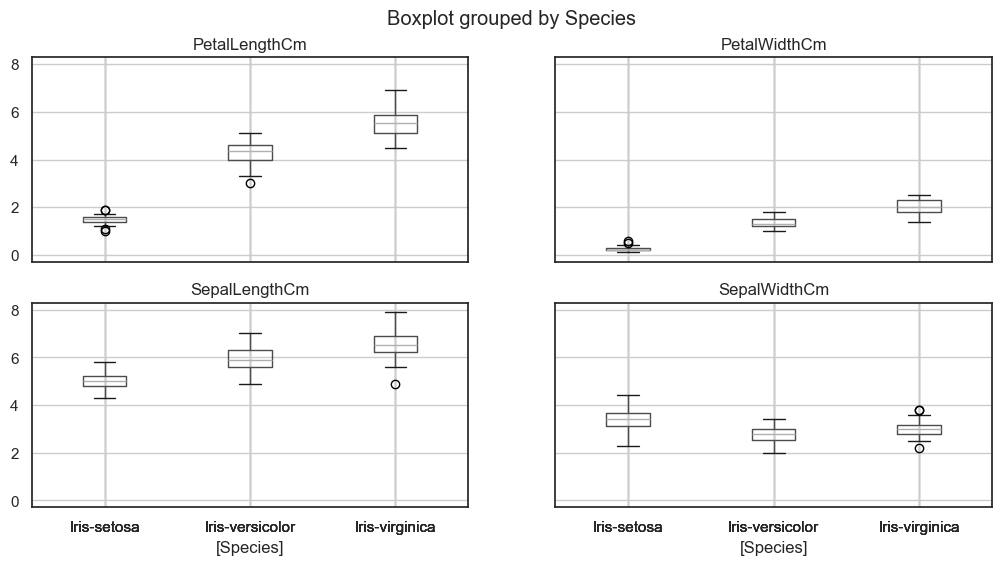

In [13]:
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

<Axes: >

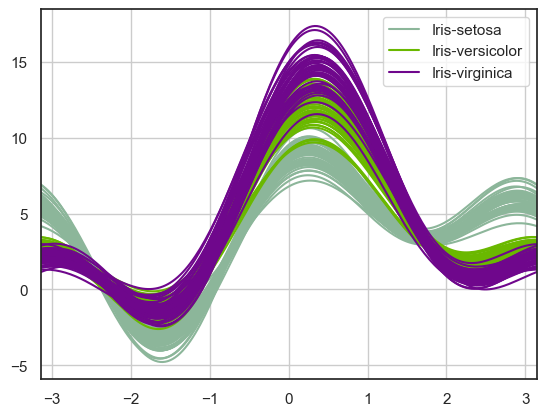

In [14]:
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

<Axes: >

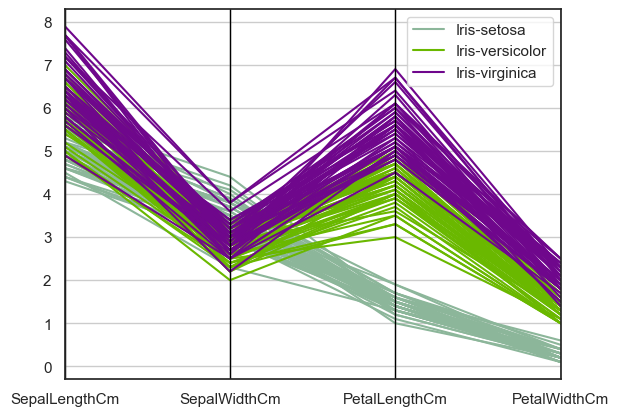

In [15]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

<Axes: >

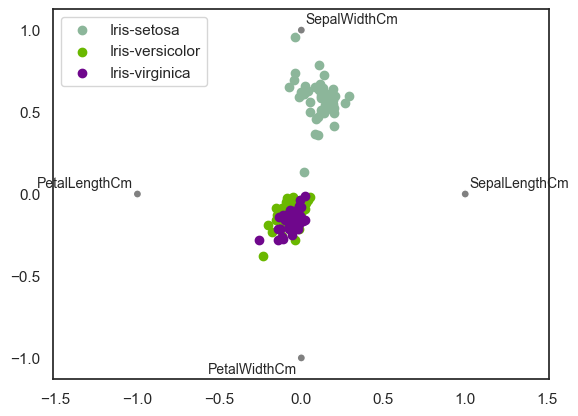

In [16]:
from pandas.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

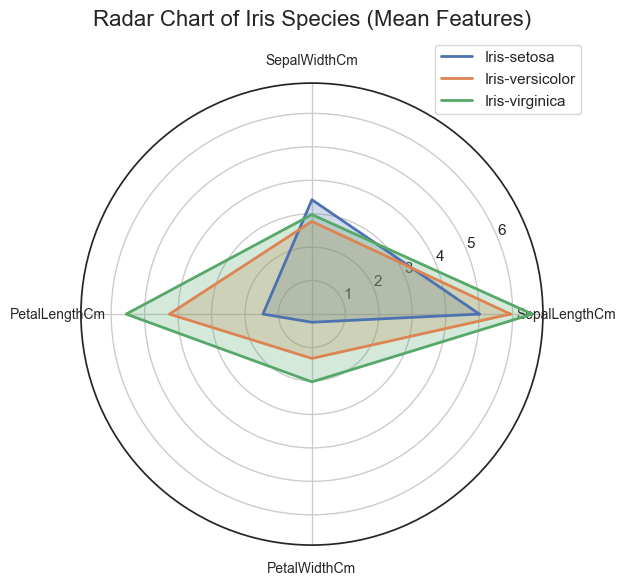

In [17]:
import math
# 2. 按种类分组，计算每个特征的平均值
df_mean = iris.groupby("Species").mean().reset_index()

# 3. 选择要展示的特征列（通常是数值型）
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
num_vars = len(features)

# 4. 雷达图需要将变量分布在一个圆周上，因此角度是等分的
angles = [n / float(num_vars) * 2 * math.pi for n in range(num_vars)]
angles += angles[:1]  # 闭合图形（首尾相连）

# 5. 初始化画布（使用极坐标）
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='polar'))

# 6. 为每个种类绘制一个雷达图
for index, row in df_mean.iterrows():
    species = row['Species']
    values = row[features].values.tolist()
    values += values[:1]  # 闭合图形

    # 绘制雷达图的多边形
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=species)
    ax.fill(angles, values, alpha=0.25)

# 7. 设置极坐标轴的标签（即每个特征）
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, fontsize=10)

# 8. 添加图例
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# 9. 添加标题
plt.title("Radar Chart of Iris Species (Mean Features)", size=16, pad=20)

# 10. 显示图形
plt.show()
